# Cografi bilgi Sistemleri

In [3]:
#%pip install -U leafmap

In [4]:
#%pip install rasterio

In [12]:
import leafmap

In [16]:
m = leafmap.Map()
m.add_basemap('HYBRID')
m

SyntaxError: invalid syntax (2600333875.py, line 3)

In [24]:
m.add_basemap('TERRAIN')
m

In [32]:
#pip install geopandas leafmap

In [34]:
import geopandas as gpd
import leafmap

In [36]:
gdf = gpd.read_file("https://github.com/opengeos/leafmap/raw/master/examples/data/cable_geo.geojson")

Skipping field coordinates: unsupported OGR type: 3


In [44]:
m = leafmap.Map()
m.add_gdf(gdf, layer_name="Cable lines")
m

In [46]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot

init_notebook_mode(connected=True)


In [48]:
import pandas as pd

In [50]:
df = pd.read_csv('2014_World_Power_Consumption')

In [52]:
df.head()

,Country,Power Consumption KWH,Text
0,China,5.523000e+12,"China 5,523,000,000,000"
1,United States,3.832000e+12,"United 3,832,000,000,000"
2,European,2.771000e+12,"European 2,771,000,000,000"
3,Russia,1.065000e+12,"Russia 1,065,000,000,000"
4,Japan,9.210000e+11,"Japan 921,000,000,000"


In [54]:
data = dict(
    type="choropleth",
    colorscale='Viridis',
    reversescale=True,
    locations=df["Country"],
    locationmode="country names",
    z=df["Power Consumption KWH"],
    text=df["Country"],
    colorbar={'title': "World Power Consunmption"}
)

layout = dict(
    title="World Power Consunmption",
    geo=dict(
        showframe=False,
        projection={'type': 'mercator'}
    )
)


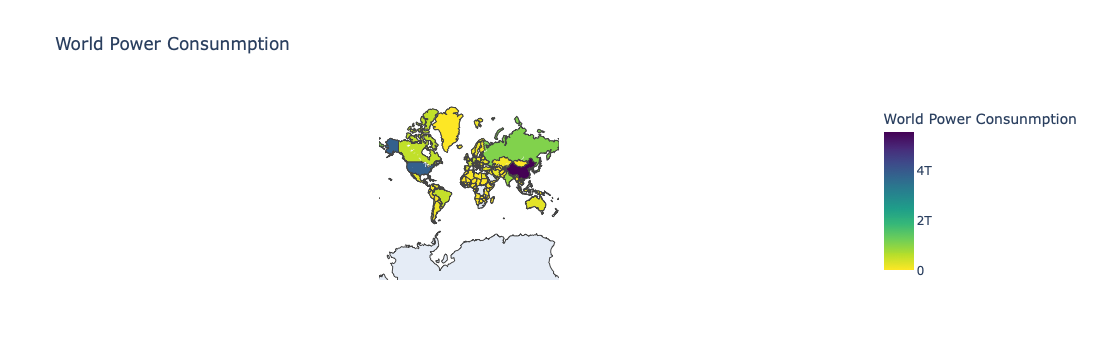

In [56]:
choromap = go.Figure(data=data, layout=layout)
iplot(choromap, validate=False)

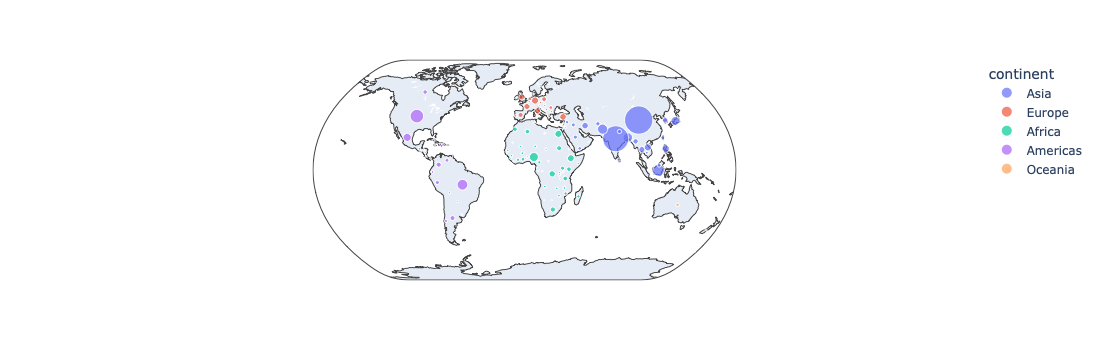

In [58]:
import plotly.express as px

df = px.data.gapminder().query("year==2007")
fig = px.scatter_geo(
    df,
    locations="iso_alpha",
    color="continent",
    hover_name="country",
    size="pop",
    projection="natural earth"
)

fig.show()


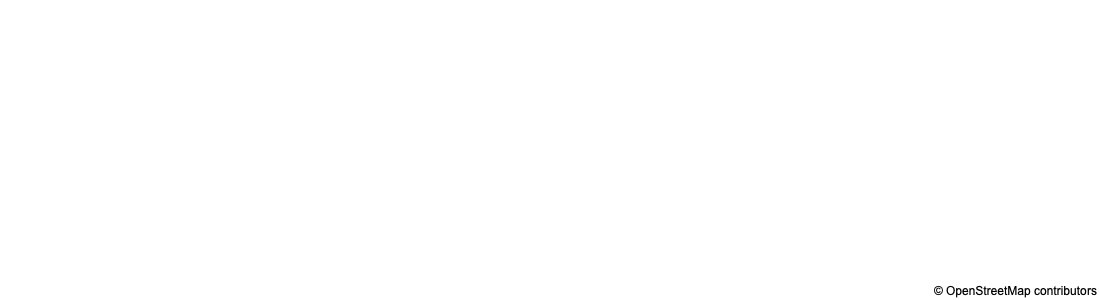

In [60]:
import pandas as pd

us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")

import plotly.express as px

fig = px.scatter_mapbox(
    us_cities, lat="lat", lon="lon", hover_name="City", hover_data=["State", "Population"],
    color_discrete_sequence=["fuchsia"], zoom=3, height=300
)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
fig.show()


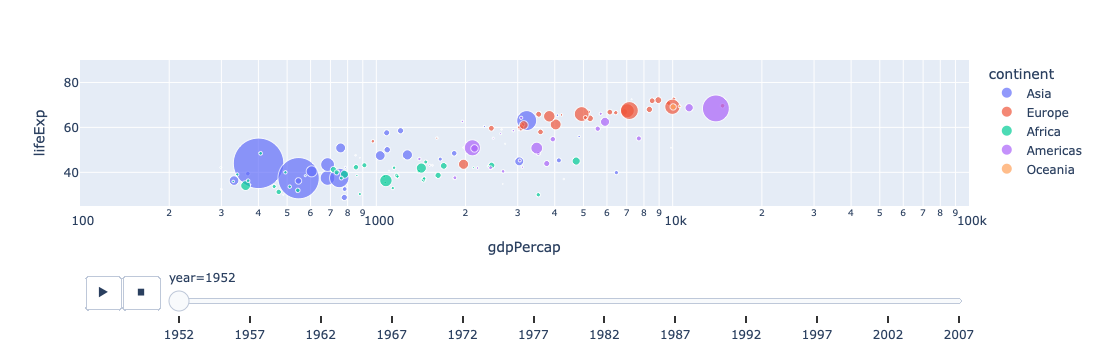

In [62]:
import plotly.express as px

df = px.data.gapminder()

px.scatter(
    df,
    x="gdpPercap", y="lifeExp",
    animation_frame="year", animation_group="country",
    size="pop", color="continent", hover_name="country",
    log_x=True, size_max=55,
    range_x=[100, 100000], range_y=[25, 90]
)
